# Лабораторная работа №3 Андреюк Д.С. 853581

In [ ]:
import numpy as np
from math import log, factorial
import matplotlib.pyplot as plt


class QueueSystem:

    def __init__(self, X=60):
        self.X = X
        self.ro = 1
        self.time = 0
        self.forward_count = 0
        self.backward_count = 0
        self.state = 0

    def get_random(self):
        return np.random.uniform(0, 1)

    def get_time_interval(self, intensity):
        if intensity != 0:
            return -1 / intensity * log(self.get_random())
        return np.inf


    def iterate(self):
        t_back = 1 / self.X
        t_for = self.get_time_interval(self.X)
        if t_back <= t_for:
            self.backward_count = 1
            self.time += t_back  
            if self.state == 1:
              self.state = 0
        else:
            self.forward_count = 1
            self.time += t_for
            if self.state == 0:
              self.state = 1

    def get_final_probs(self):
        p[0] = 1 / (1 + self.ro)
        p[1] = self.ro / (1 + self.ro)
        return p[0] + p[1]

    def get_rel_throughput(self):
        return 1 / (1 + self.ro)

    def get_abs_throughput(self):
        return self.X * 1 / (1 + self.ro)


Theoretical relative throughput: 0.5
Empirical relative throughput: 0.5
Theoretical absolute throughput: 0.005
Empirical absolute throughput: 0.005


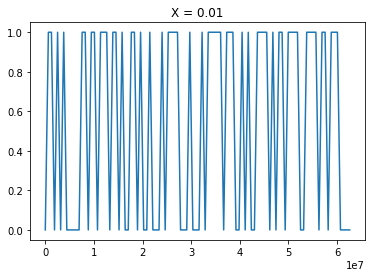

Theoretical relative throughput: 0.5
Empirical relative throughput: 0.5
Theoretical absolute throughput: 0.05
Empirical absolute throughput: 0.05


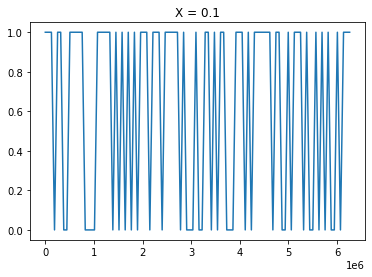

Theoretical relative throughput: 0.5
Empirical relative throughput: 0.5
Theoretical absolute throughput: 0.1
Empirical absolute throughput: 0.1


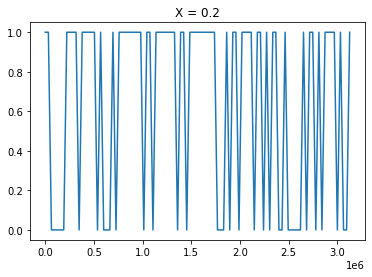

Theoretical relative throughput: 0.5
Empirical relative throughput: 0.5
Theoretical absolute throughput: 0.25
Empirical absolute throughput: 0.25


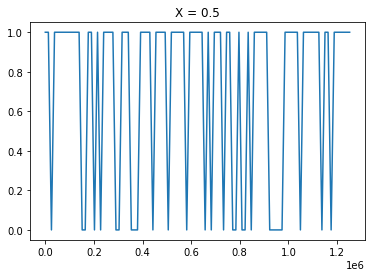

Theoretical relative throughput: 0.5
Empirical relative throughput: 0.5
Theoretical absolute throughput: 0.5
Empirical absolute throughput: 0.5


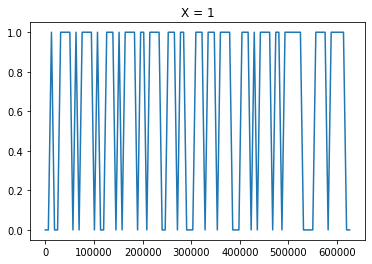

Theoretical relative throughput: 0.5
Empirical relative throughput: 0.5
Theoretical absolute throughput: 1.0
Empirical absolute throughput: 1.0


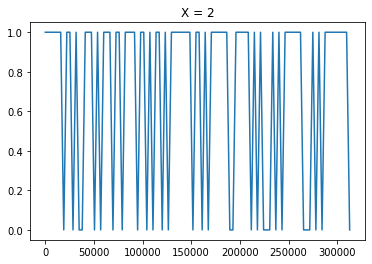

Theoretical relative throughput: 0.5
Empirical relative throughput: 0.5
Theoretical absolute throughput: 1.5
Empirical absolute throughput: 1.5


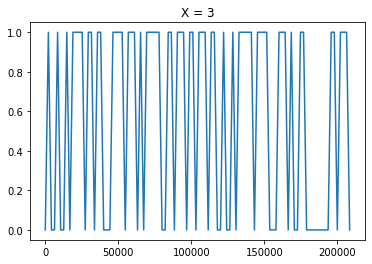

Theoretical relative throughput: 0.5
Empirical relative throughput: 0.5
Theoretical absolute throughput: 2.5
Empirical absolute throughput: 2.5


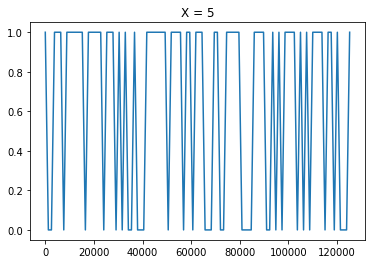

Theoretical relative throughput: 0.5
Empirical relative throughput: 0.5
Theoretical absolute throughput: 10.0
Empirical absolute throughput: 10.0


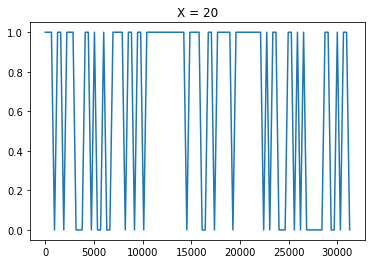

In [ ]:
for X in [0.01, 0.1, 0.2, 0.5, 1, 2, 3, 5, 20]:
  states = []
  timestamps = []
  volume = 1000000
  qs = QueueSystem(X)
  for _ in range(volume):
      qs.iterate()
      states.append(qs.state)
      timestamps.append(qs.time)

  theor_rel_throughput = qs.get_rel_throughput()
  print(f'Theoretical relative throughput: {theor_rel_throughput}')
  emp_rel_throughput = qs.backward_count / (qs.forward_count + qs.backward_count)
  print(f'Empirical relative throughput: {emp_rel_throughput}')
  
  theor_abs_throughput = qs.get_abs_throughput()
  print(f'Theoretical absolute throughput: {theor_abs_throughput}')
  emp_abs_throughput = qs.X * qs.backward_count / (qs.forward_count + qs.backward_count)
  print(f'Empirical absolute throughput: {emp_abs_throughput}')
  
  plt.plot(timestamps[::volume // 100], states[::volume // 100])
  plt.title(f'X = {X}')
  plt.show()